# Download dataset

In [1]:
! pip install kaggle

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes


In [3]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/My Drive/Google colab Save/kaggle/tweet_disaster

/content/drive/My Drive/Google colab Save/kaggle/tweet_disaster


In [11]:
!kaggle competitions download -c nlp-getting-started

  0% 0.00/411k [00:00<?, ?B/s]
100% 411k/411k [00:00<00:00, 28.4MB/s]
  0% 0.00/965k [00:00<?, ?B/s]
100% 965k/965k [00:00<00:00, 30.8MB/s]
  0% 0.00/22.2k [00:00<?, ?B/s]
100% 22.2k/22.2k [00:00<00:00, 3.10MB/s]


# Exploratory Data Analysis

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [15]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [17]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [19]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [20]:
train.head(100)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
95,137,accident,Charlotte,9 Mile backup on I-77 South...accident blockin...,1
96,138,accident,"Baton Rouge, LA",Has an accident changed your life? We will hel...,0
97,139,accident,"Hagerstown, MD",#BREAKING: there was a deadly motorcycle car a...,1
98,141,accident,"Gloucestershire , UK",@flowri were you marinading it or was it an ac...,0


### Distribution of Target

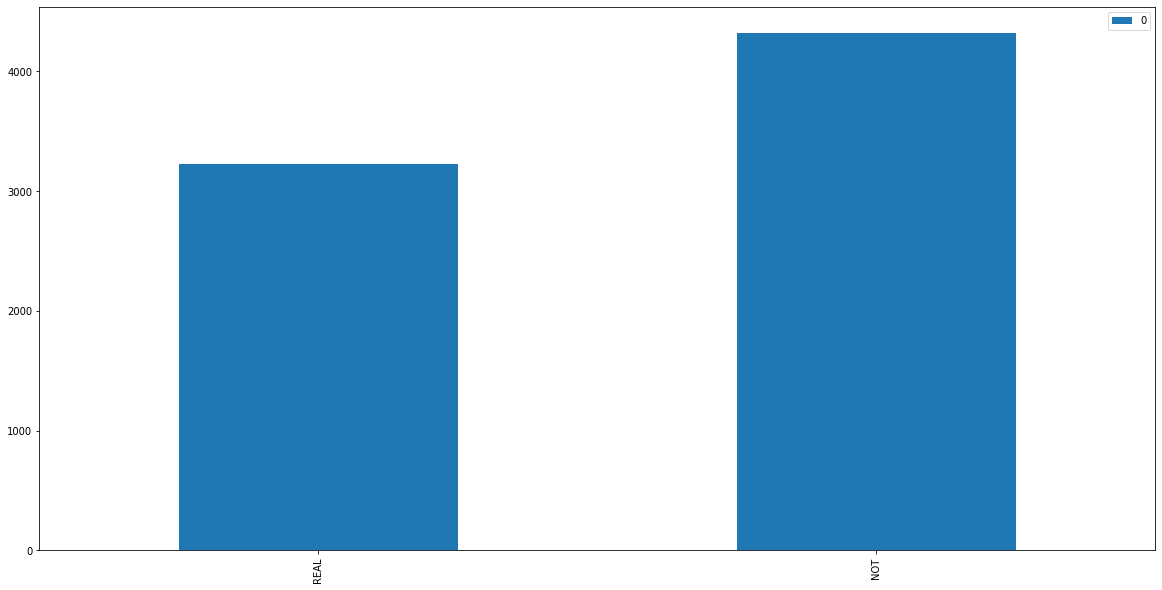

In [71]:
temp_real = train[train['target']==1]['keyword'].count()
temp_not = train[train['target']==0]['keyword'].count()
df = pd.DataFrame([temp_real, temp_not])
df.index=['REAL','NOT']
df.plot(kind='bar',stacked=True,figsize=(20,10))


In [76]:
def length(text):
  return len(text)

### length of text

In [77]:
train['length'] = train['text'].apply(length)
train.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


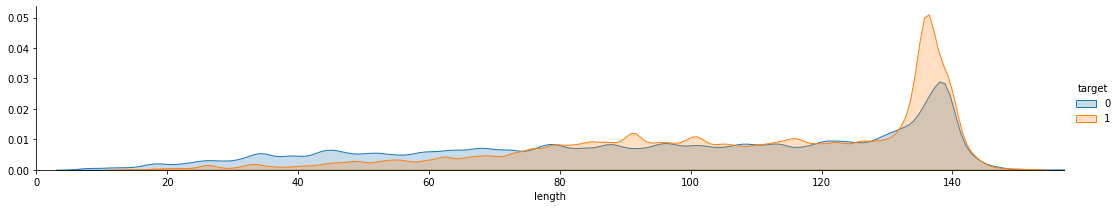

In [81]:
facet = sns.FacetGrid(train, hue='target', aspect=5)
facet.map(sns.kdeplot, 'length', shade=True, bw_adjust=.2)
facet.set(xlim=(0, train['length'].max()))
facet.add_legend()

plt.show()

In [84]:
train['num_words'] = train['text'].apply(lambda x : len(x.split()))
train.head()

,id,keyword,location,text,target,length,num_words
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16


### number of words

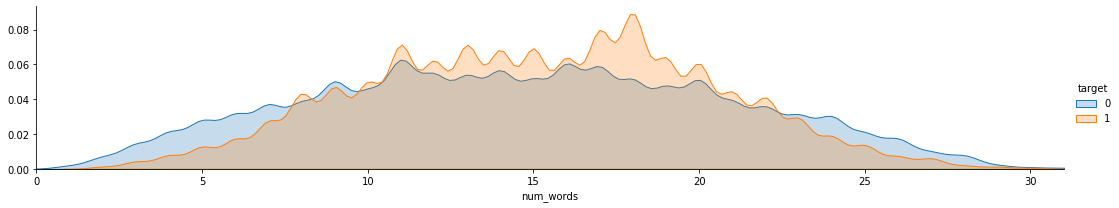

In [86]:
facet = sns.FacetGrid(train, hue='target', aspect=5)
facet.map(sns.kdeplot, 'num_words', shade=True, bw_adjust=.4)
facet.set(xlim=(0, train['num_words'].max()))
facet.add_legend()

plt.show()

### average length of words

In [87]:
train.head()

,id,keyword,location,text,target,length,num_words
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16


In [105]:
temp = train['text'].str.split().map(lambda x : [len(word) for word in x])
train['ave_len_word'] = temp.apply(lambda x : np.mean(x))
train.head()

,id,keyword,location,text,target,length,num_words,ave_len_word
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,4.384615
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,4.571429
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,5.090909
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,7.125000
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,4.500000


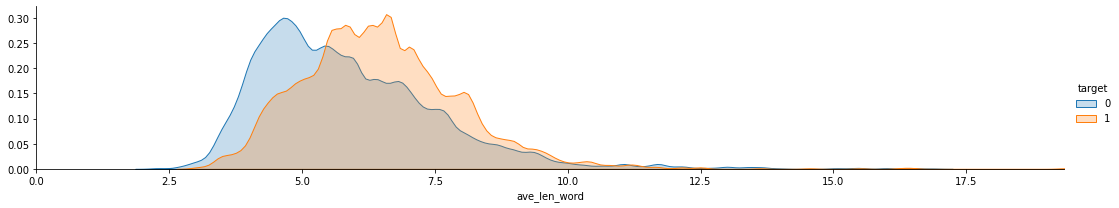

In [106]:
facet = sns.FacetGrid(train, hue='target', aspect=5)
facet.map(sns.kdeplot, 'ave_len_word', shade=True, bw_adjust=.4)
facet.set(xlim=(0, train['ave_len_word'].max()))
facet.add_legend()

plt.show()

### text having http link

In [122]:
pattern = r'(https?://[^\s]+)'
train['num_url'] = train['text'].apply(lambda x: len(re.findall(pattern, x)))

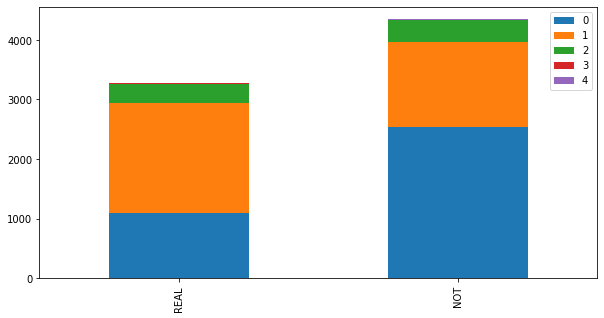

In [132]:
temp_real = train[train['target']==1].num_url.value_counts()
temp_not = train[train['target']==0].num_url.value_counts()
df = pd.DataFrame([temp_real,temp_not])
df.index=['REAL','NOT']
df.plot(kind='bar',stacked=True,figsize=(10,5))

### num of #hash in text

In [133]:
pattern = '[#]'
train['text'].apply(lambda x: len(re.findall(pattern, x)))

0       1
1       0
2       0
3       1
4       2
       ..
7608    0
7609    0
7610    0
7611    0
7612    0
Name: text, Length: 7613, dtype: int64

In [134]:
train['num_ht'] = train['text'].apply(lambda x: len(re.findall(pattern, x)))
train['num_ht'].value_counts()

0     5852
1      964
2      405
3      208
4       83
5       41
6       26
10      10
7        8
8        8
13       4
11       2
9        2
Name: num_ht, dtype: int64

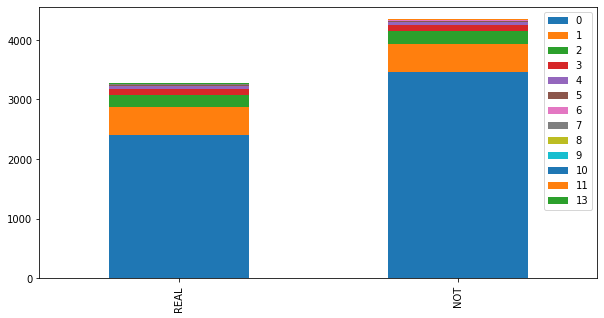

In [137]:
temp_real = train[train['target']==1].num_ht.value_counts()
temp_not = train[train['target']==0].num_ht.value_counts()
df = pd.DataFrame([temp_real,temp_not])
df.index=['REAL','NOT']
df.plot(kind='bar',stacked=True,figsize=(10,5))

In [138]:
train.corr()

,id,target,length,num_words,ave_len_word,num_url,num_ht
id,1.000000,0.060781,0.017393,0.006420,0.014523,0.013063,0.000634
target,0.060781,1.000000,0.181817,0.039966,0.176855,0.195678,0.058115
length,0.017393,0.181817,1.000000,0.837386,0.036815,0.296150,0.210393
num_words,0.006420,0.039966,0.837386,1.000000,-0.453199,-0.123908,0.046404
ave_len_word,0.014523,0.176855,0.036815,-0.453199,1.000000,0.639581,0.192254
num_url,0.013063,0.195678,0.296150,-0.123908,0.639581,1.000000,0.175719
num_ht,0.000634,0.058115,0.210393,0.046404,0.192254,0.175719,1.000000


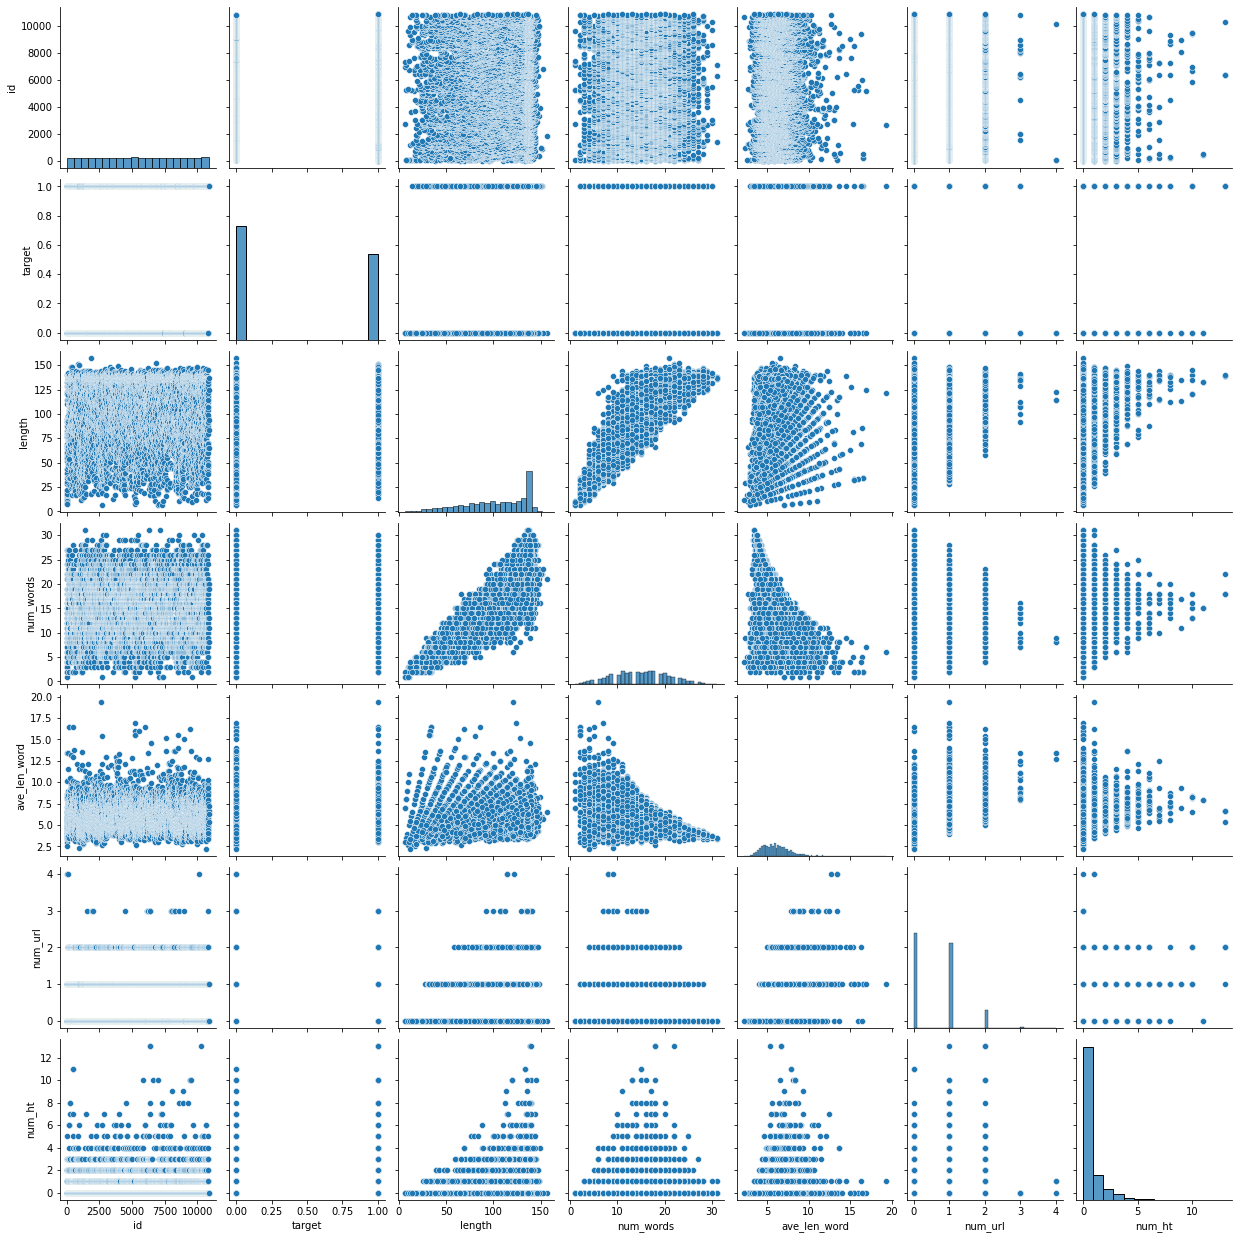

In [139]:
sns.pairplot(train)

In [174]:
pattern = r'(https?://[^\s]+)'
train['url'] = train['text'].apply(lambda x: re.findall(pattern,x))
train['non_url_text'] = train['text'].apply(lambda x: re.sub(pattern,' ',x))
train.head()

,id,keyword,location,text,target,length,num_words,ave_len_word,clean_text,num_url,num_ht,tokenized_text,detoken_text,url,non_url_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,4.384615,deeds reason this earthquake allah forgive,0,1,"[deeds, reason, earthquake, allah, forgive]",deeds reason earthquake allah forgive,[],Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,4.571429,forest fire near ronge sask canada,0,0,"[forest, fire, near, ronge, sask, canada]",forest fire near ronge sask canada,[],Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,5.090909,residents asked shelter place being notified o...,0,0,"[residents, asked, shelter, place, notified, o...",residents asked shelter place notified officer...,[],All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,7.125000,people receive wildfires evacuation orders cal...,0,1,"[people, receive, wildfires, evacuation, order...",people receive wildfires evacuation orders cal...,[],"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,4.500000,just sent this photo from ruby alaska smoke fr...,0,2,"[sent, photo, ruby, alaska, smoke, wildfires, ...",sent photo ruby alaska smoke wildfires pours s...,[],Just got sent this photo from Ruby #Alaska as ...


# NLP

## Text Preprocessing

In [147]:
import nltk
from nltk.corpus import stopwords

nltk.download("popular")
stop_words = stopwords.words('english')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [175]:
train['non_url_text'].str.replace('[^a-zA-Z]', ' ')

0       Our Deeds are the Reason of this  earthquake M...
1                  Forest fire near La Ronge Sask  Canada
2       All residents asked to  shelter in place  are ...
3              people receive  wildfires evacuation or...
4       Just got sent this photo from Ruby  Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609     aria ahrary  TheTawniest The out of control w...
7610         M            UTC   km S of Volcano Hawaii   
7611    Police investigating after an e bike collided ...
7612    The Latest  More Homes Razed by Northern Calif...
Name: non_url_text, Length: 7613, dtype: object

In [176]:
train['clean_text'] = train['non_url_text'].str.replace('[^a-zA-Z]', ' ')
train.head()

,id,keyword,location,text,target,length,num_words,ave_len_word,clean_text,num_url,num_ht,tokenized_text,detoken_text,url,non_url_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,4.384615,Our Deeds are the Reason of this earthquake M...,0,1,"[deeds, reason, earthquake, allah, forgive]",deeds reason earthquake allah forgive,[],Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,4.571429,Forest fire near La Ronge Sask Canada,0,0,"[forest, fire, near, ronge, sask, canada]",forest fire near ronge sask canada,[],Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,5.090909,All residents asked to shelter in place are ...,0,0,"[residents, asked, shelter, place, notified, o...",residents asked shelter place notified officer...,[],All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,7.125000,people receive wildfires evacuation or...,0,1,"[people, receive, wildfires, evacuation, order...",people receive wildfires evacuation orders cal...,[],"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,4.500000,Just got sent this photo from Ruby Alaska as ...,0,2,"[sent, photo, ruby, alaska, smoke, wildfires, ...",sent photo ruby alaska smoke wildfires pours s...,[],Just got sent this photo from Ruby #Alaska as ...


In [177]:
train['clean_text'] = train['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if len(word)>3]))

In [178]:
train['clean_text'].apply(lambda x: x.lower())

0              deeds reason this earthquake allah forgive
1                      forest fire near ronge sask canada
2       residents asked shelter place being notified o...
3       people receive wildfires evacuation orders cal...
4       just sent this photo from ruby alaska smoke fr...
                              ...                        
7608    giant cranes holding bridge collapse into near...
7609    aria ahrary thetawniest control wild fires cal...
7610                                       volcano hawaii
7611    police investigating after bike collided with ...
7612    latest more homes razed northern california wi...
Name: clean_text, Length: 7613, dtype: object

In [179]:
train['clean_text'] = train['clean_text'].apply(lambda x: x.lower())
train.clean_text

0              deeds reason this earthquake allah forgive
1                      forest fire near ronge sask canada
2       residents asked shelter place being notified o...
3       people receive wildfires evacuation orders cal...
4       just sent this photo from ruby alaska smoke fr...
                              ...                        
7608    giant cranes holding bridge collapse into near...
7609    aria ahrary thetawniest control wild fires cal...
7610                                       volcano hawaii
7611    police investigating after bike collided with ...
7612    latest more homes razed northern california wi...
Name: clean_text, Length: 7613, dtype: object

In [180]:
tokenized_text = train['clean_text'].apply(lambda x : x.split())
tokenized_text = tokenized_text.apply(lambda x : [word for word in x if word not in stop_words])
tokenized_text

0             [deeds, reason, earthquake, allah, forgive]
1               [forest, fire, near, ronge, sask, canada]
2       [residents, asked, shelter, place, notified, o...
3       [people, receive, wildfires, evacuation, order...
4       [sent, photo, ruby, alaska, smoke, wildfires, ...
                              ...                        
7608    [giant, cranes, holding, bridge, collapse, nea...
7609    [aria, ahrary, thetawniest, control, wild, fir...
7610                                    [volcano, hawaii]
7611    [police, investigating, bike, collided, little...
7612    [latest, homes, razed, northern, california, w...
Name: clean_text, Length: 7613, dtype: object

In [181]:
train['token_text'] = tokenized_text
train.head()

,id,keyword,location,text,target,length,num_words,ave_len_word,clean_text,num_url,num_ht,tokenized_text,detoken_text,url,non_url_text,token_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,4.384615,deeds reason this earthquake allah forgive,0,1,"[deeds, reason, earthquake, allah, forgive]",deeds reason earthquake allah forgive,[],Our Deeds are the Reason of this #earthquake M...,"[deeds, reason, earthquake, allah, forgive]"
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,4.571429,forest fire near ronge sask canada,0,0,"[forest, fire, near, ronge, sask, canada]",forest fire near ronge sask canada,[],Forest fire near La Ronge Sask. Canada,"[forest, fire, near, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,5.090909,residents asked shelter place being notified o...,0,0,"[residents, asked, shelter, place, notified, o...",residents asked shelter place notified officer...,[],All residents asked to 'shelter in place' are ...,"[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,7.125000,people receive wildfires evacuation orders cal...,0,1,"[people, receive, wildfires, evacuation, order...",people receive wildfires evacuation orders cal...,[],"13,000 people receive #wildfires evacuation or...","[people, receive, wildfires, evacuation, order..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,4.500000,just sent this photo from ruby alaska smoke fr...,0,2,"[sent, photo, ruby, alaska, smoke, wildfires, ...",sent photo ruby alaska smoke wildfires pours s...,[],Just got sent this photo from Ruby #Alaska as ...,"[sent, photo, ruby, alaska, smoke, wildfires, ..."


In [182]:
train['detoken_text'] = train['token_text'].apply(lambda x :' '.join(x))

## LSA (Latent Semantic Analysis)
- 確率的な方法（tf-idf）に用い、SVD（matrixの次元を縮小）の形に変換する。
 - tf-idf
 - topic modeling : LSA

In [166]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english',
                             max_features=5000,
                             max_df = 0.8,
                             smooth_idf=True
                             )

In [183]:
X = vectorizer.fit_transform(train['detoken_text'])
X.shape

(7613, 5000)

In [184]:
from sklearn.decomposition import TruncatedSVD

svd_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
len(svd_model.components_)

10

In [185]:
terms = vectorizer.get_feature_names()

def get_topics(components, feature_names, n=10):
  for idx, topic in enumerate(components):
    print('Topic %d'%(idx+1), [(feature_names[i], topic[i].round(4)) for i in topic.argsort()[:-n-1:-1]])

In [186]:
get_topics(svd_model.components_,terms)

Topic 1 [('like', 0.3903), ('california', 0.3086), ('northern', 0.2569), ('wildfire', 0.2466), ('homes', 0.2369), ('news', 0.2329), ('latest', 0.2256), ('razed', 0.2193), ('disaster', 0.161), ('people', 0.1147)]
Topic 2 [('california', 0.3172), ('wildfire', 0.2734), ('northern', 0.2706), ('homes', 0.2682), ('razed', 0.2528), ('latest', 0.2501), ('news', 0.1513), ('obama', 0.0379), ('fires', 0.0347), ('saipan', 0.0224)]
Topic 3 [('families', 0.5497), ('legionnaires', 0.3708), ('malaysia', 0.2792), ('confirmed', 0.2641), ('wreckage', 0.2631), ('conclusively', 0.2519), ('investigators', 0.2217), ('outbreak', 0.2211), ('fatal', 0.2117), ('affected', 0.1929)]
Topic 4 [('suicide', 0.4417), ('bomb', 0.3412), ('bomber', 0.3395), ('army', 0.2509), ('detonated', 0.2335), ('turkey', 0.2249), ('trench', 0.2228), ('released', 0.2074), ('saudi', 0.1645), ('mosque', 0.1529)]
Topic 5 [('disaster', 0.6465), ('obama', 0.3853), ('typhoon', 0.2385), ('devastated', 0.2278), ('declares', 0.2146), ('saipan',

## LDA(Latent Dirichlet Allocation)
- 単語があるトピックに存在する確率と
- 文章の中にあるトピックが存在する確率を
- Dirichlet分布として仮定し、推定する。

In [194]:
from gensim import corpora
import gensim

dictionary = corpora.Dictionary(train['token_text'])
corpus = [dictionary.doc2bow(text) for text in train['token_text']]
print(corpus[1])

[(5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]


In [195]:
for i, count in corpus[1]:
  print(dictionary[i])
print(len(dictionary))

canada
fire
forest
near
ronge
sask
14731


In [200]:
NUM_TOPICS = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
  print(topic)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

(0, '0.012*"wildfire" + 0.009*"army" + 0.009*"severe" + 0.008*"suicide" + 0.008*"traumatised"')
(1, '0.016*"suicide" + 0.010*"obama" + 0.008*"attack" + 0.008*"confirmed" + 0.008*"saudi"')
(2, '0.015*"like" + 0.014*"video" + 0.012*"youtube" + 0.010*"world" + 0.008*"smoke"')
(3, '0.010*"wounded" + 0.009*"reddit" + 0.008*"structural" + 0.008*"police" + 0.008*"state"')
(4, '0.020*"disaster" + 0.014*"families" + 0.011*"typhoon" + 0.010*"wreck" + 0.009*"wreckage"')
(5, '0.012*"time" + 0.008*"earthquake" + 0.007*"volcano" + 0.007*"school" + 0.007*"screams"')
(6, '0.010*"sinking" + 0.010*"water" + 0.008*"violent" + 0.008*"content" + 0.008*"tragedy"')
(7, '0.012*"hiroshima" + 0.010*"year" + 0.010*"weapons" + 0.009*"watch" + 0.009*"train"')
(8, '0.016*"fires" + 0.015*"california" + 0.009*"emergency" + 0.008*"latest" + 0.008*"wild"')
(9, '0.020*"storm" + 0.013*"fire" + 0.009*"thunderstorm" + 0.009*"like" + 0.008*"released"')


In [198]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 10.7MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=a90d6a4cab358837807fdb19b319345d4ebf011c0157f675a26e1bb7dfab1516
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [201]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel,corpus,dictionary)
pyLDAvis.display(vis)